In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#will connect to database in final version
data = pd.read_csv('medical_data.csv')
data.head(100)

,animal_type,record_no,status,date,record_type,record_sub_type
0,Cat,M44244776,Completed,23-Mar-18,Surgery,HSWC Spay Resident
1,Cat,M43625283,Completed,2-Feb-18,Surgery,HSWC Spay Resident
2,Cat,M43817874,Completed,30-Jan-18,Surgery,HSWC Spay Resident
3,Cat,M43511736,Completed,25-Jan-18,Surgery,HSWC Neut Resident
4,Cat,M44784946,Completed,3-May-18,Surgery,HSWC Spay Resident
...,...,...,...,...,...,...
95,Cat,M46267241,Completed,31-Jul-18,Surgery,HSWC Neut Resident
96,Cat,M46354339,Completed,3-Aug-18,Surgery,HSWC Spay Resident
97,Cat,M46899854,Completed,7-Sep-18,Surgery,HSWC Spay Resident
98,Cat,M46327445,Completed,3-Aug-18,Surgery,HSWC Spay Resident


In [21]:
df = data.loc[(data.record_sub_type == 'Neuter') | (data.record_sub_type == 'Spay')]
df.head()

,animal_type,record_no,status,date,record_type,record_sub_type
9,Cat,M43589053,Completed,30-Jan-18,Surgery,Spay
122,Cat,M47141232,Completed,21-Sep-18,Surgery,Neuter
123,Cat,M47130392,Completed,21-Sep-18,Surgery,Neuter
124,Cat,M47130425,Completed,21-Sep-18,Surgery,Neuter
125,Cat,M47130644,Completed,21-Sep-18,Surgery,Spay


In [4]:
df = df.drop(['record_no','status','record_type'], axis = 1)
df.head()

,animal_type,date,record_sub_type
9,Cat,30-Jan-18,Spay
122,Cat,21-Sep-18,Neuter
123,Cat,21-Sep-18,Neuter
124,Cat,21-Sep-18,Neuter
125,Cat,21-Sep-18,Spay


In [5]:
# get spay and neuter count for each month 

In [6]:
#get month from date
df['month'] = pd.DatetimeIndex(df['date']).month

In [7]:
df = df.drop(['date'], axis = 1)
df.head()

,animal_type,record_sub_type,month
9,Cat,Spay,1
122,Cat,Neuter,9
123,Cat,Neuter,9
124,Cat,Neuter,9
125,Cat,Spay,9


In [9]:
counts_df = df.groupby(['month', 'animal_type','record_sub_type']).size().reset_index(name='counts')
counts_df

,month,animal_type,record_sub_type,counts
0,1,Cat,Neuter,5
1,1,Cat,Spay,9
2,1,Dog,Neuter,4
3,1,Dog,Spay,10
4,2,Dog,Neuter,1
5,3,Cat,Neuter,4
6,3,Cat,Spay,7
7,3,Dog,Spay,2
8,4,Cat,Neuter,2
9,5,Cat,Neuter,3


In [10]:
lr_df = counts_df.drop (['animal_type','record_sub_type'], axis=1)
lr_df

,month,counts
0,1,5
1,1,9
2,1,4
3,1,10
4,2,1
5,3,4
6,3,7
7,3,2
8,4,2
9,5,3


In [13]:
X = lr_df.month.values.reshape(-1, 1)

In [14]:
X.shape

(36, 1)

In [15]:
y = lr_df.counts

In [16]:
model = LinearRegression()

In [17]:
model.fit(X, y)

LinearRegression()

In [18]:
y_pred = model.predict(X)
print(y_pred.shape)

(36,)


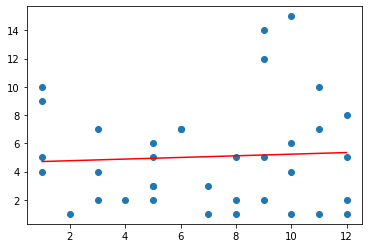

In [19]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()